In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os
from matplotlib.patches import Ellipse

In [23]:
spec_ctrl = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Data_Master_Sheet_Phenorm.xlsx', sheet_name = 'Ctrl_Orth')
spec_trt = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Data_Master_Sheet_Phenorm.xlsx', sheet_name = 'Trt_Orth')

In [24]:
pcc = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\PCA\\PheNorm\\Loadings_VIP_colorcoded.xlsx', sheet_name='Orth')
pcc

,exp,753.117,754.26,755.404,756.546,757.688,758.831,759.973,761.114,762.256,...,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2,1733.08
0,2mins,-0.033042,-0.030278,-0.027369,-0.024315,-0.021115,-0.017771,-0.014281,-0.010646,-0.005719,...,-0.004239,-0.007469,-0.010776,-0.013695,-0.015889,-0.017692,-0.018619,-0.018705,-0.017173,-0.013647
1,20mins,-0.043052,-0.047513,-0.050904,-0.053223,-0.054472,-0.054649,-0.053756,-0.051793,-0.046721,...,0.008230,0.008732,0.010256,0.012384,0.014570,0.016039,0.017032,0.017224,0.016528,0.015187
2,40mins,0.078312,0.077917,0.076584,0.074315,0.071108,0.066964,0.061883,0.055865,0.045354,...,0.043671,0.043697,0.043423,0.043128,0.042334,0.040874,0.038881,0.036834,0.035075,0.033468
3,60mins,0.034057,0.022742,0.012438,0.003145,-0.005136,-0.012406,-0.018665,-0.023912,-0.026082,...,0.022266,0.023161,0.023940,0.026406,0.027206,0.027154,0.027912,0.029851,0.031868,0.034208
4,24h,0.007840,-0.006896,-0.019664,-0.030462,-0.039291,-0.046152,-0.051043,-0.053965,-0.057078,...,0.030851,0.031147,0.031309,0.031510,0.031889,0.032174,0.031997,0.031249,0.029718,0.027200


In [25]:
ctrl_mean = spec_ctrl.mean(numeric_only=True)[2:]
trt_mean = spec_trt.groupby('trt_time').mean(numeric_only=True).reset_index()
trt_mean['trt_time'] = pd.Categorical(trt_mean['trt_time'], categories= ['2mins',  '20mins',     '40mins',    '60mins',  '24h'])
trt_mean = trt_mean.sort_values('trt_time').reset_index(drop=True)
trt_mean

,trt_time,exp,spectra_num,753.117,754.26,755.404,756.546,757.688,758.831,759.973,...,1724.28,1725.16,1726.04,1726.92,1727.8,1728.68,1729.56,1730.44,1731.32,1732.2
0,2mins,2.025056e+07,4.937500,0.562164,0.628469,0.687813,0.740198,0.785622,0.824086,0.855590,...,0.380156,0.384785,0.389566,0.394193,0.398235,0.401365,0.403503,0.404265,0.403439,0.400517
1,20mins,2.025056e+07,4.774194,0.461958,0.528948,0.589823,0.644583,0.693229,0.735759,0.772175,...,0.443470,0.444447,0.445203,0.445754,0.445987,0.445961,0.445359,0.444231,0.442579,0.440644
2,40mins,2.025056e+07,4.774194,0.629475,0.700523,0.763237,0.817619,0.863666,0.901381,0.930762,...,0.485633,0.486040,0.485483,0.483907,0.482062,0.479555,0.476483,0.472878,0.469290,0.466440
3,60mins,2.025056e+07,4.774194,0.489342,0.552090,0.608583,0.658821,0.702802,0.740528,0.771999,...,0.462941,0.464159,0.465731,0.467508,0.469986,0.471876,0.472500,0.471739,0.470183,0.467787
4,24h,2.025056e+07,5.457143,0.606030,0.655396,0.700584,0.741595,0.778427,0.811082,0.839558,...,0.618774,0.624615,0.629565,0.633412,0.635787,0.636756,0.636118,0.633574,0.629539,0.624534


In [157]:
np.arange(-.1, .11, .05)

array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ])

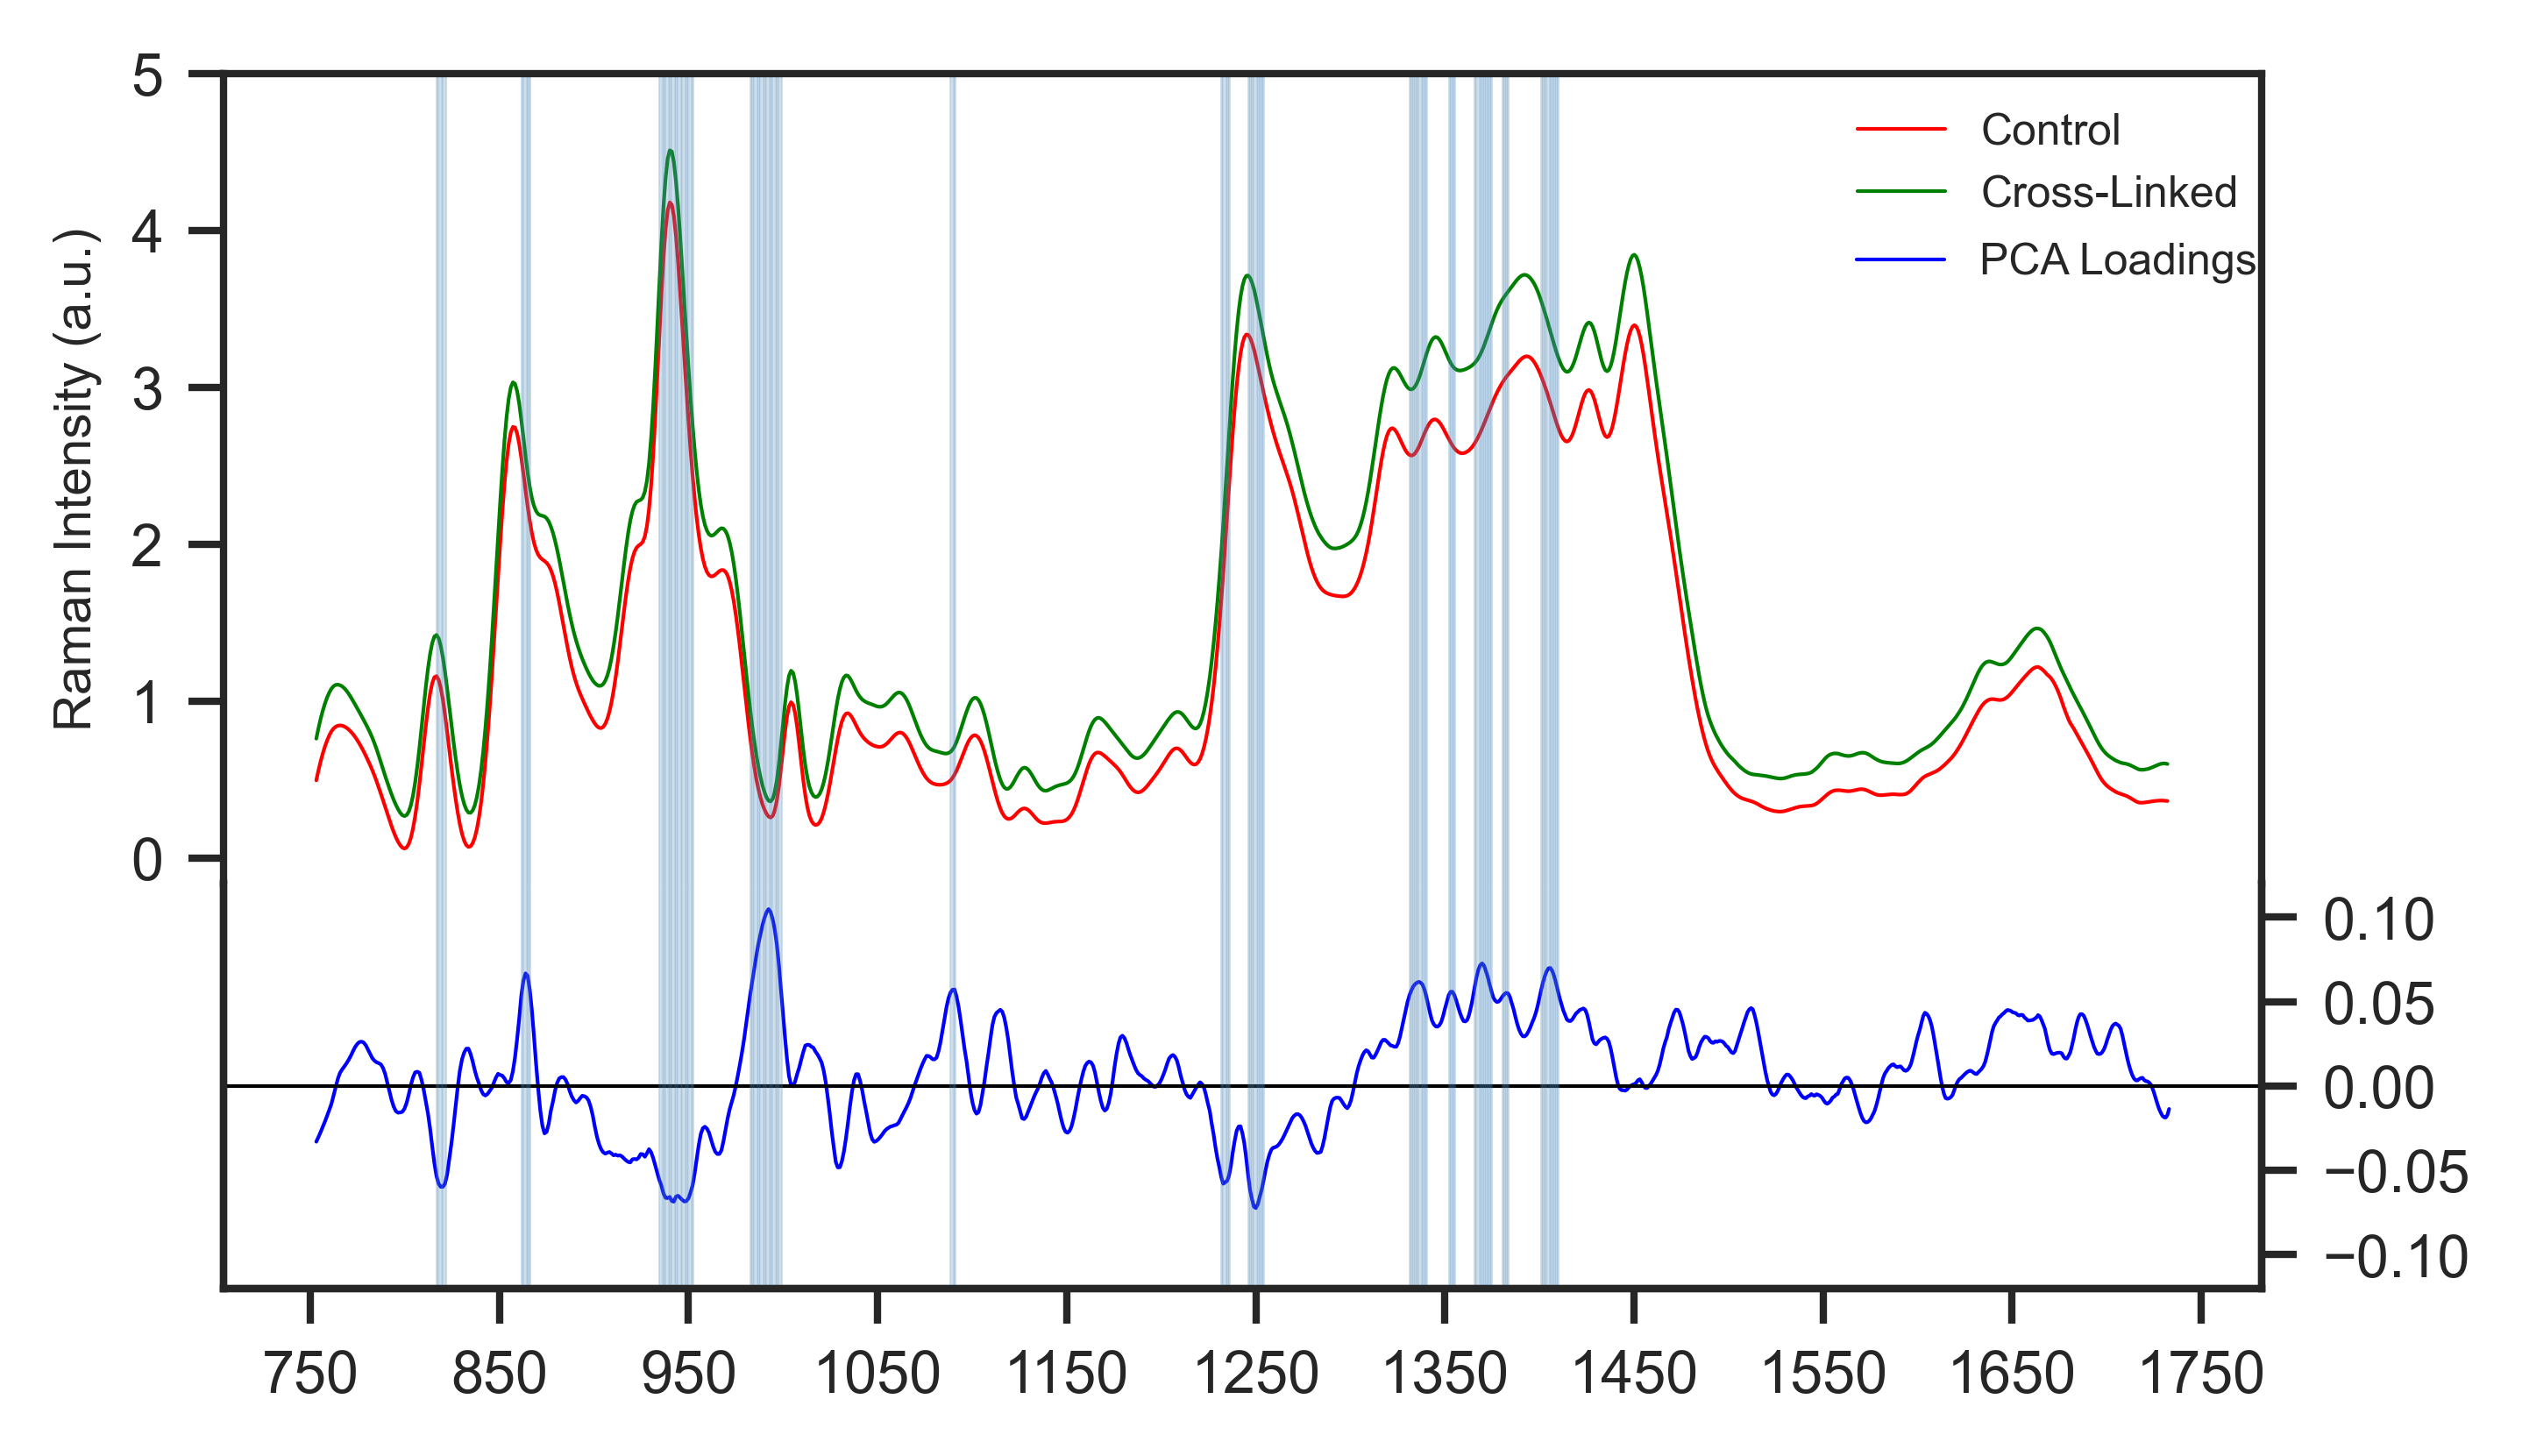

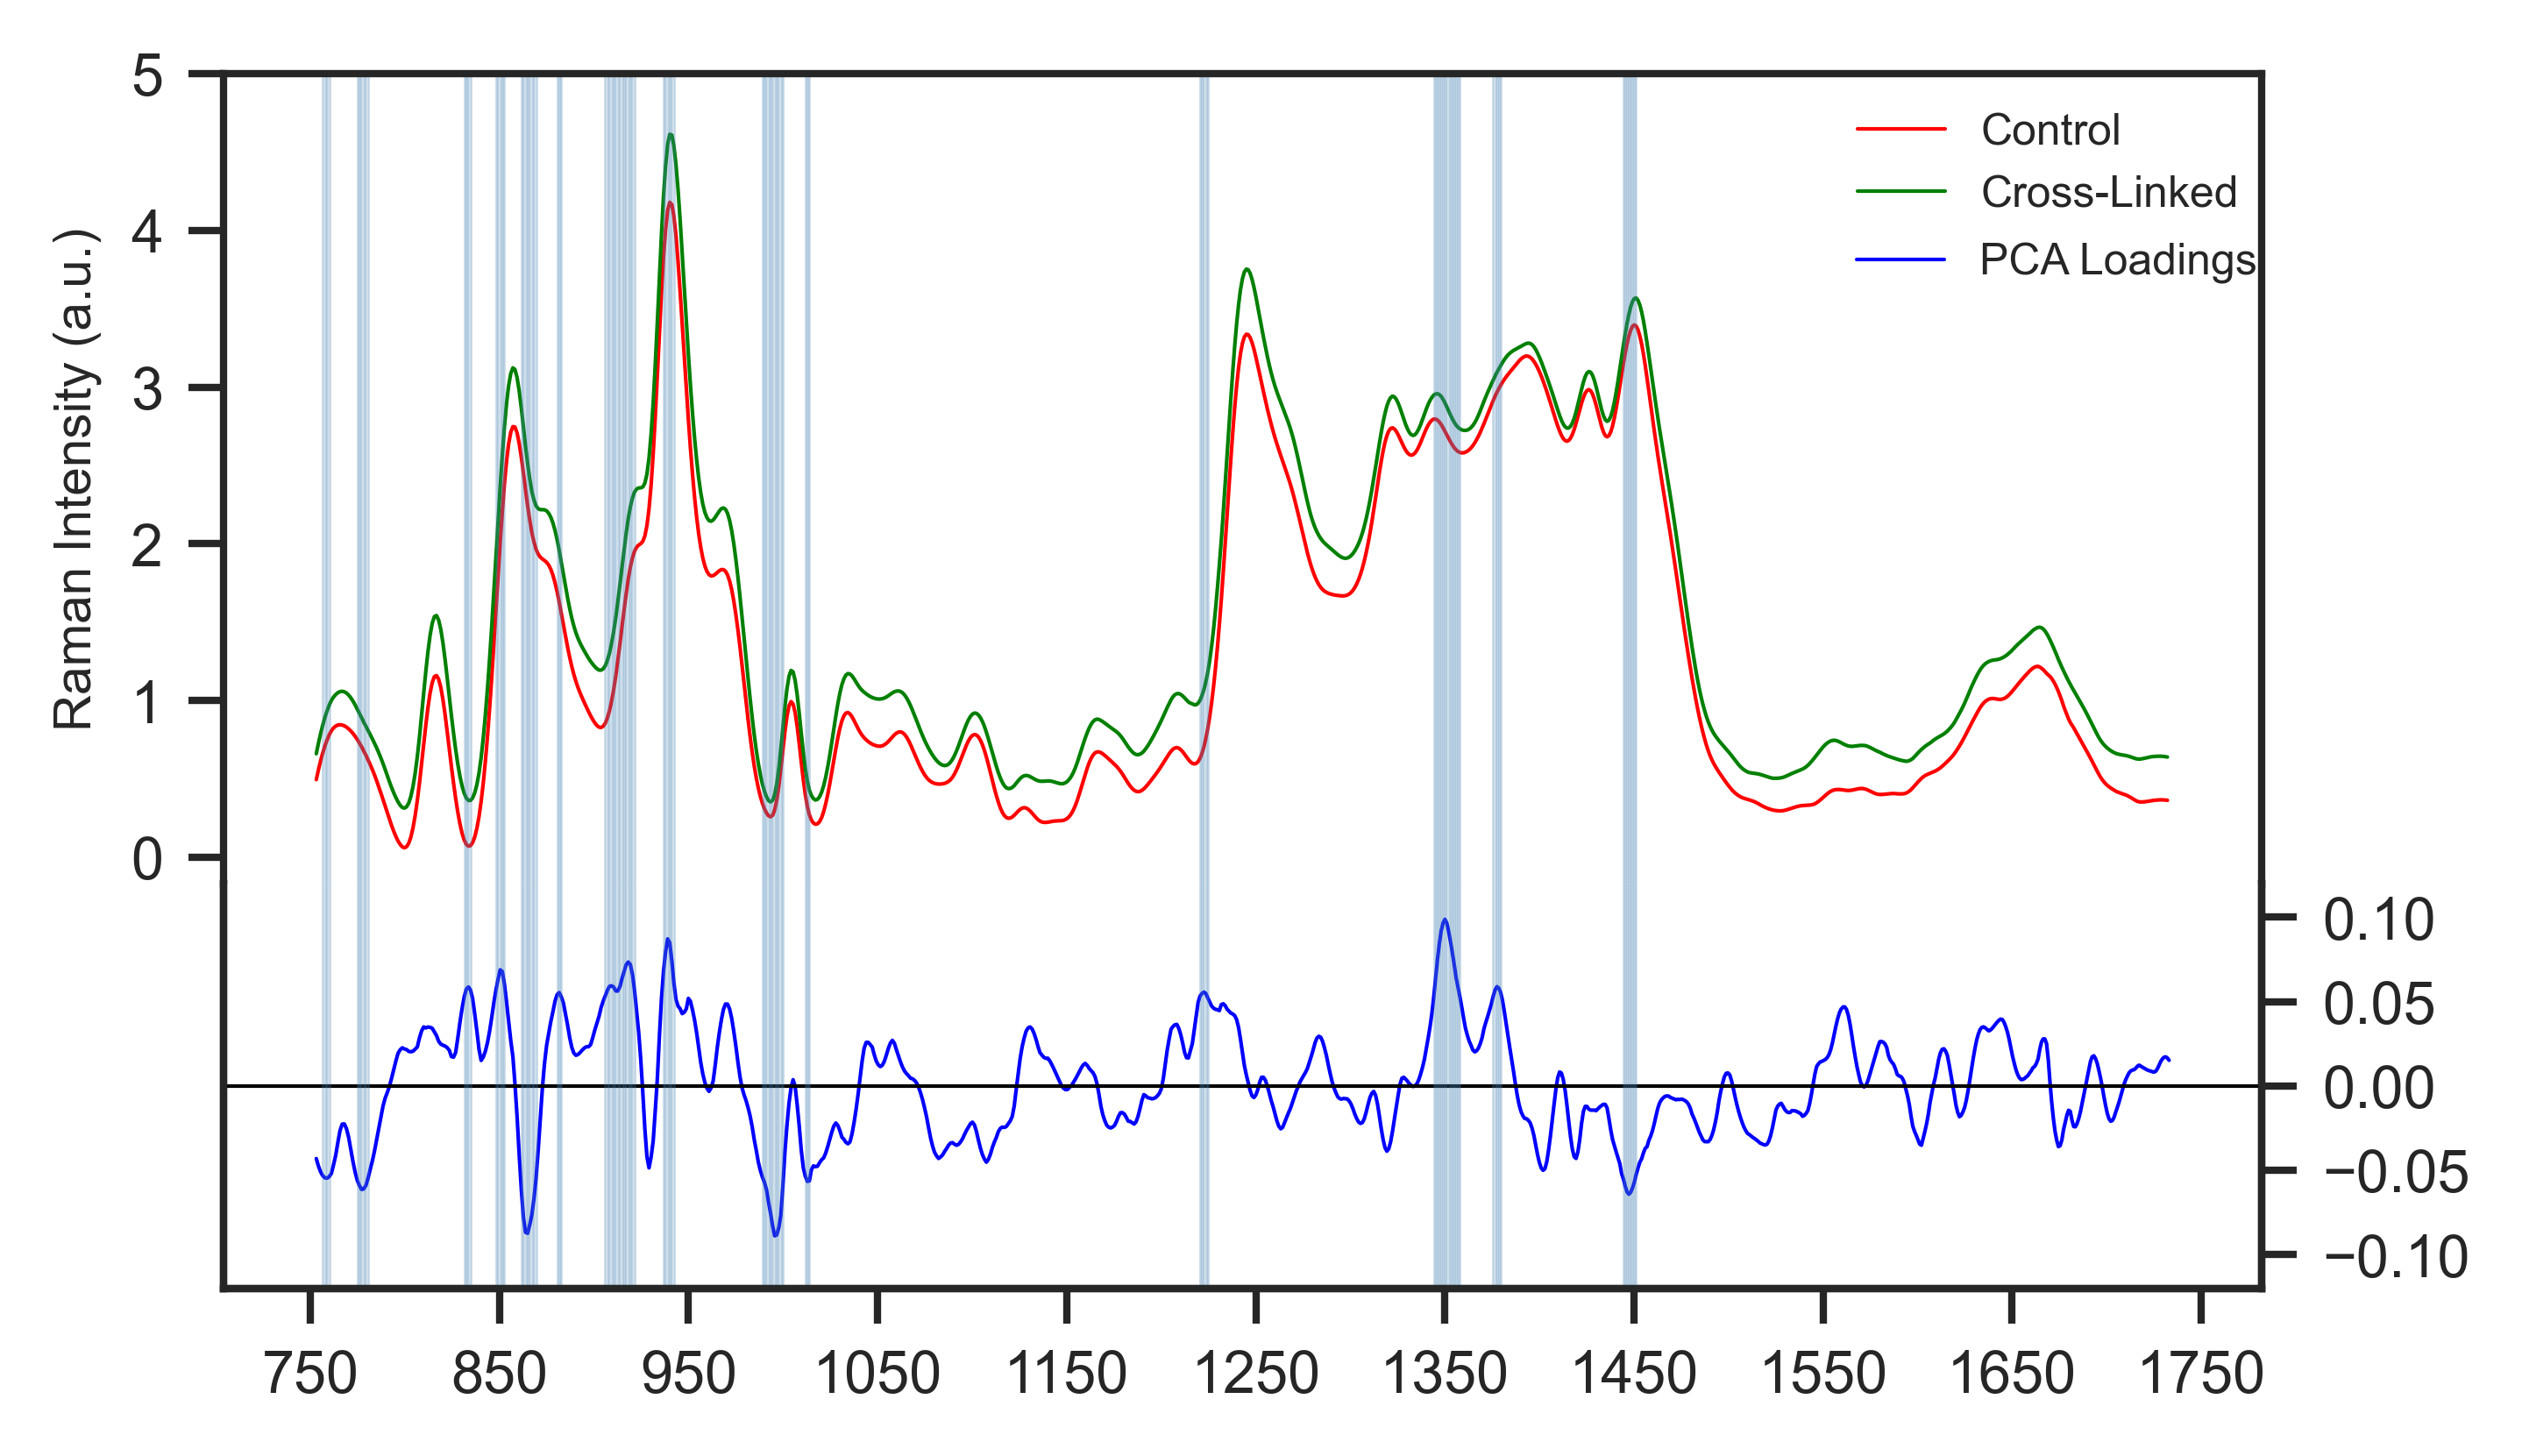

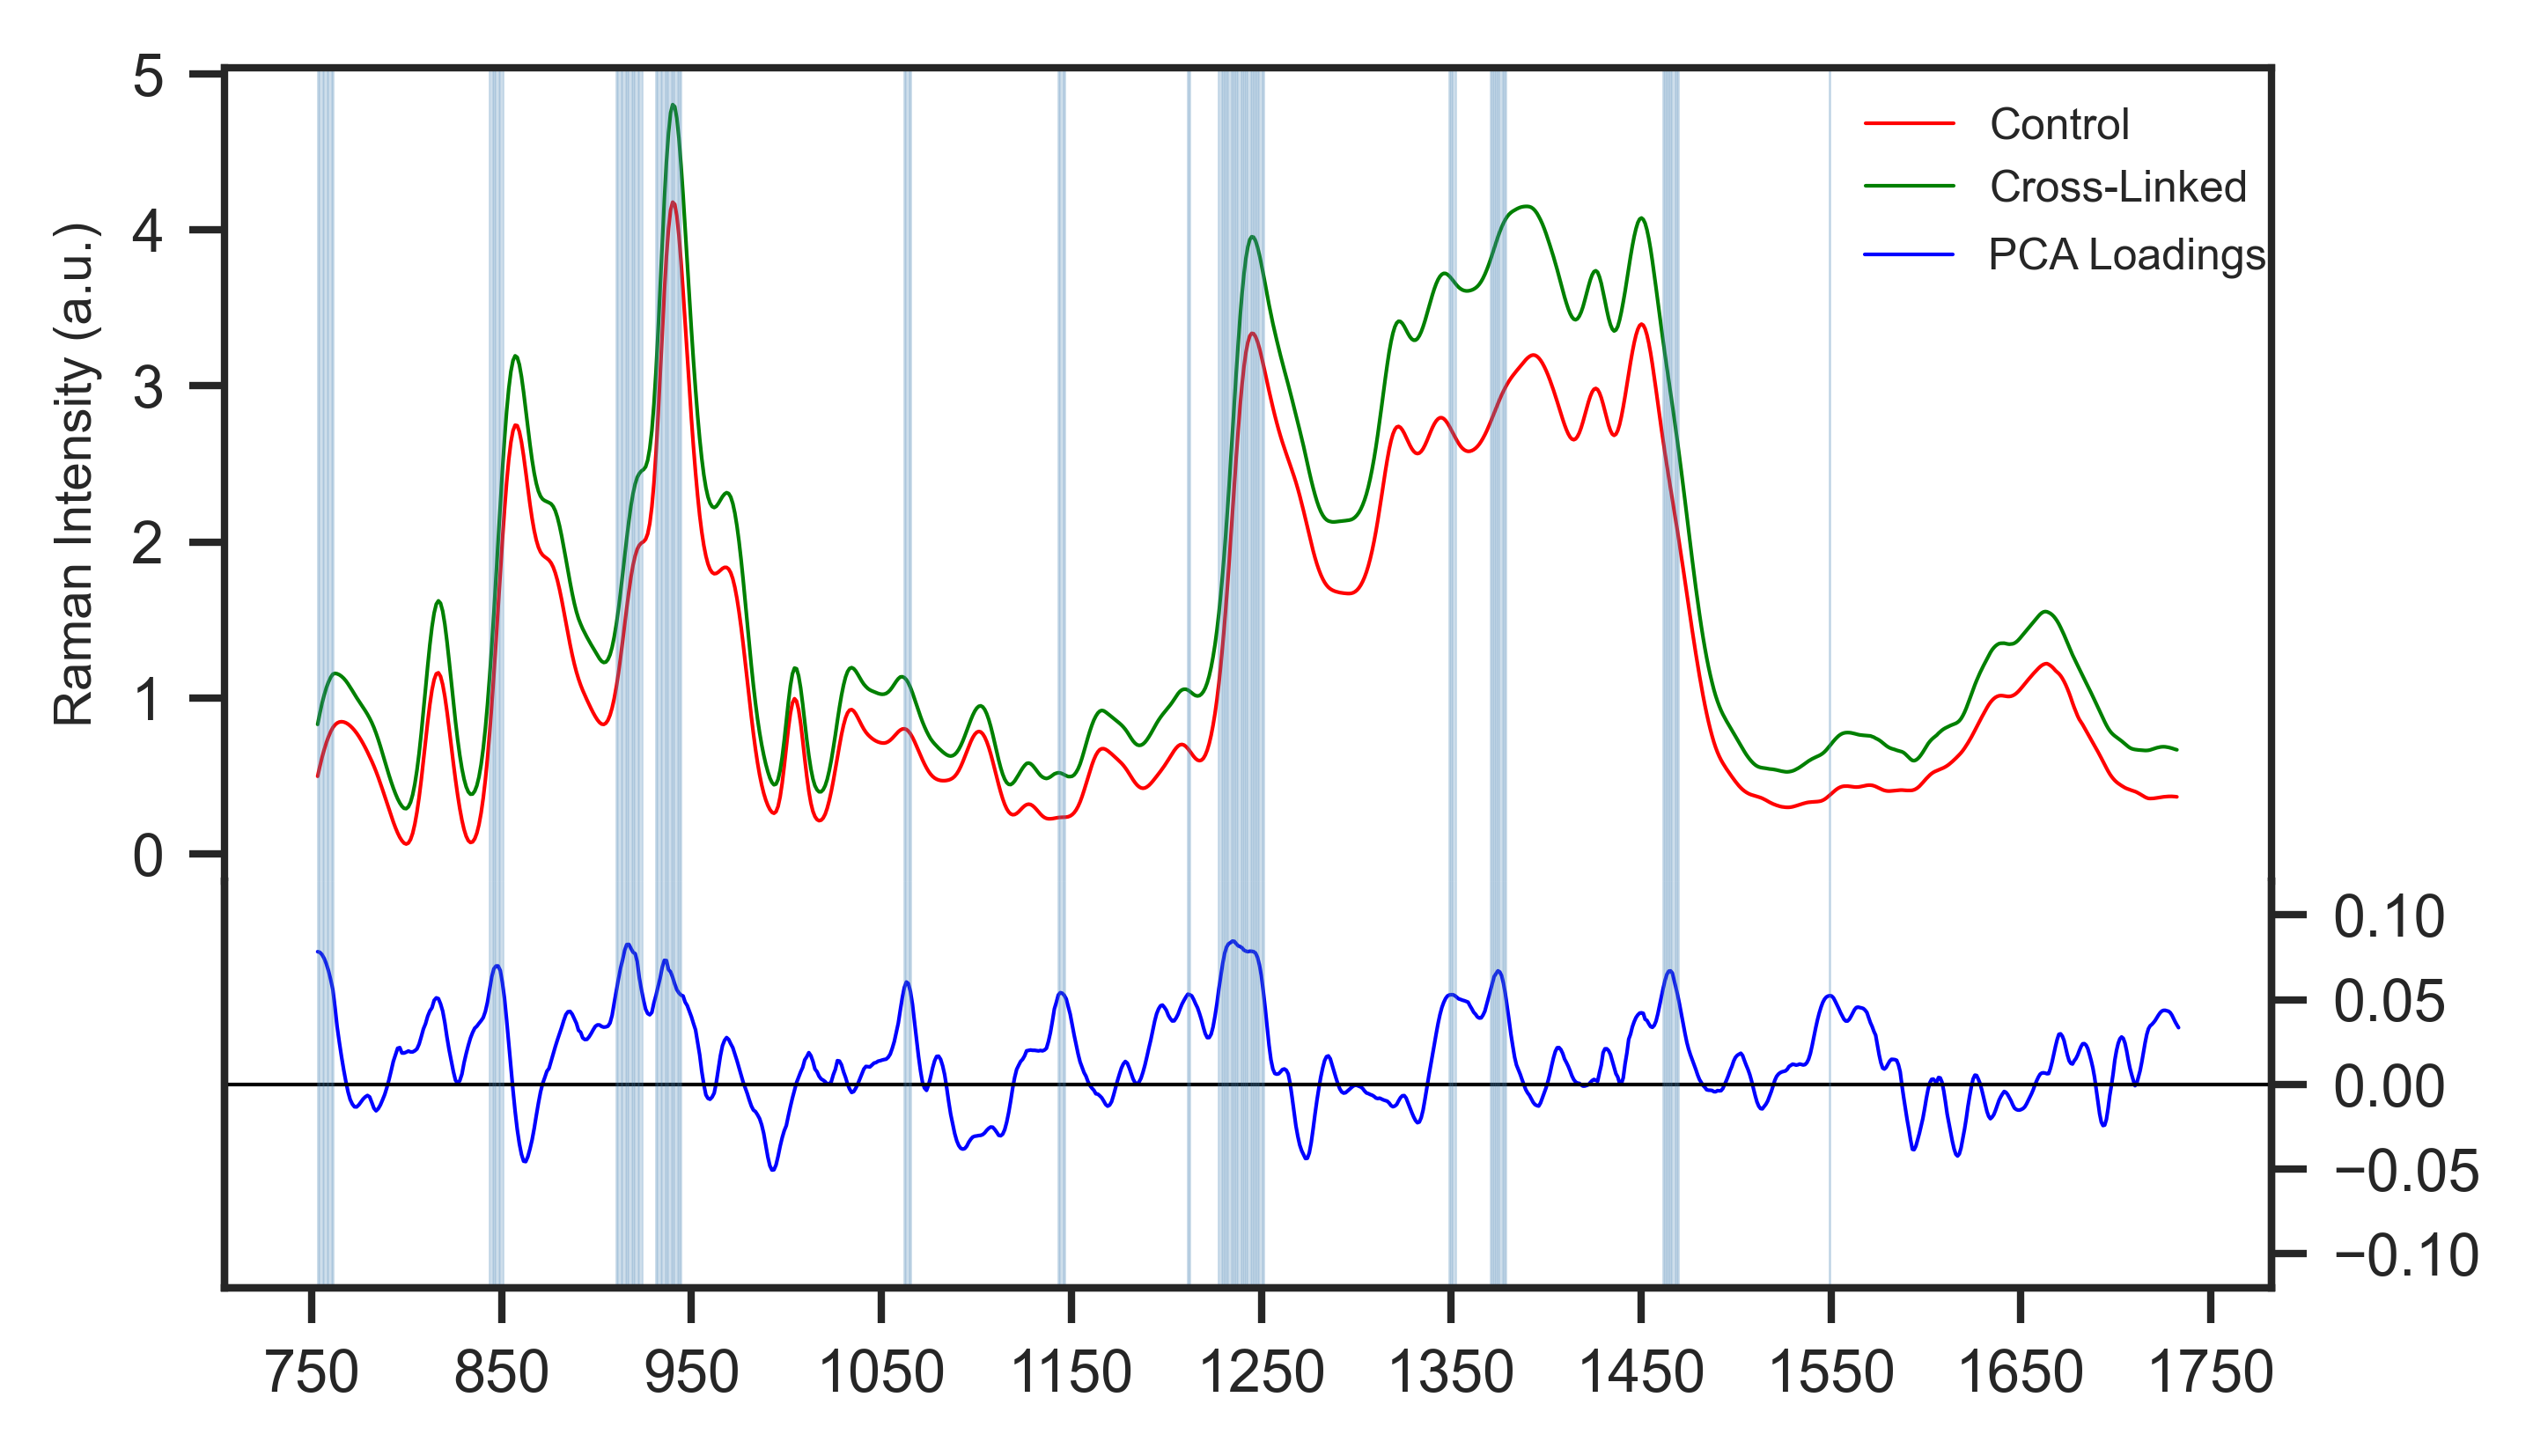

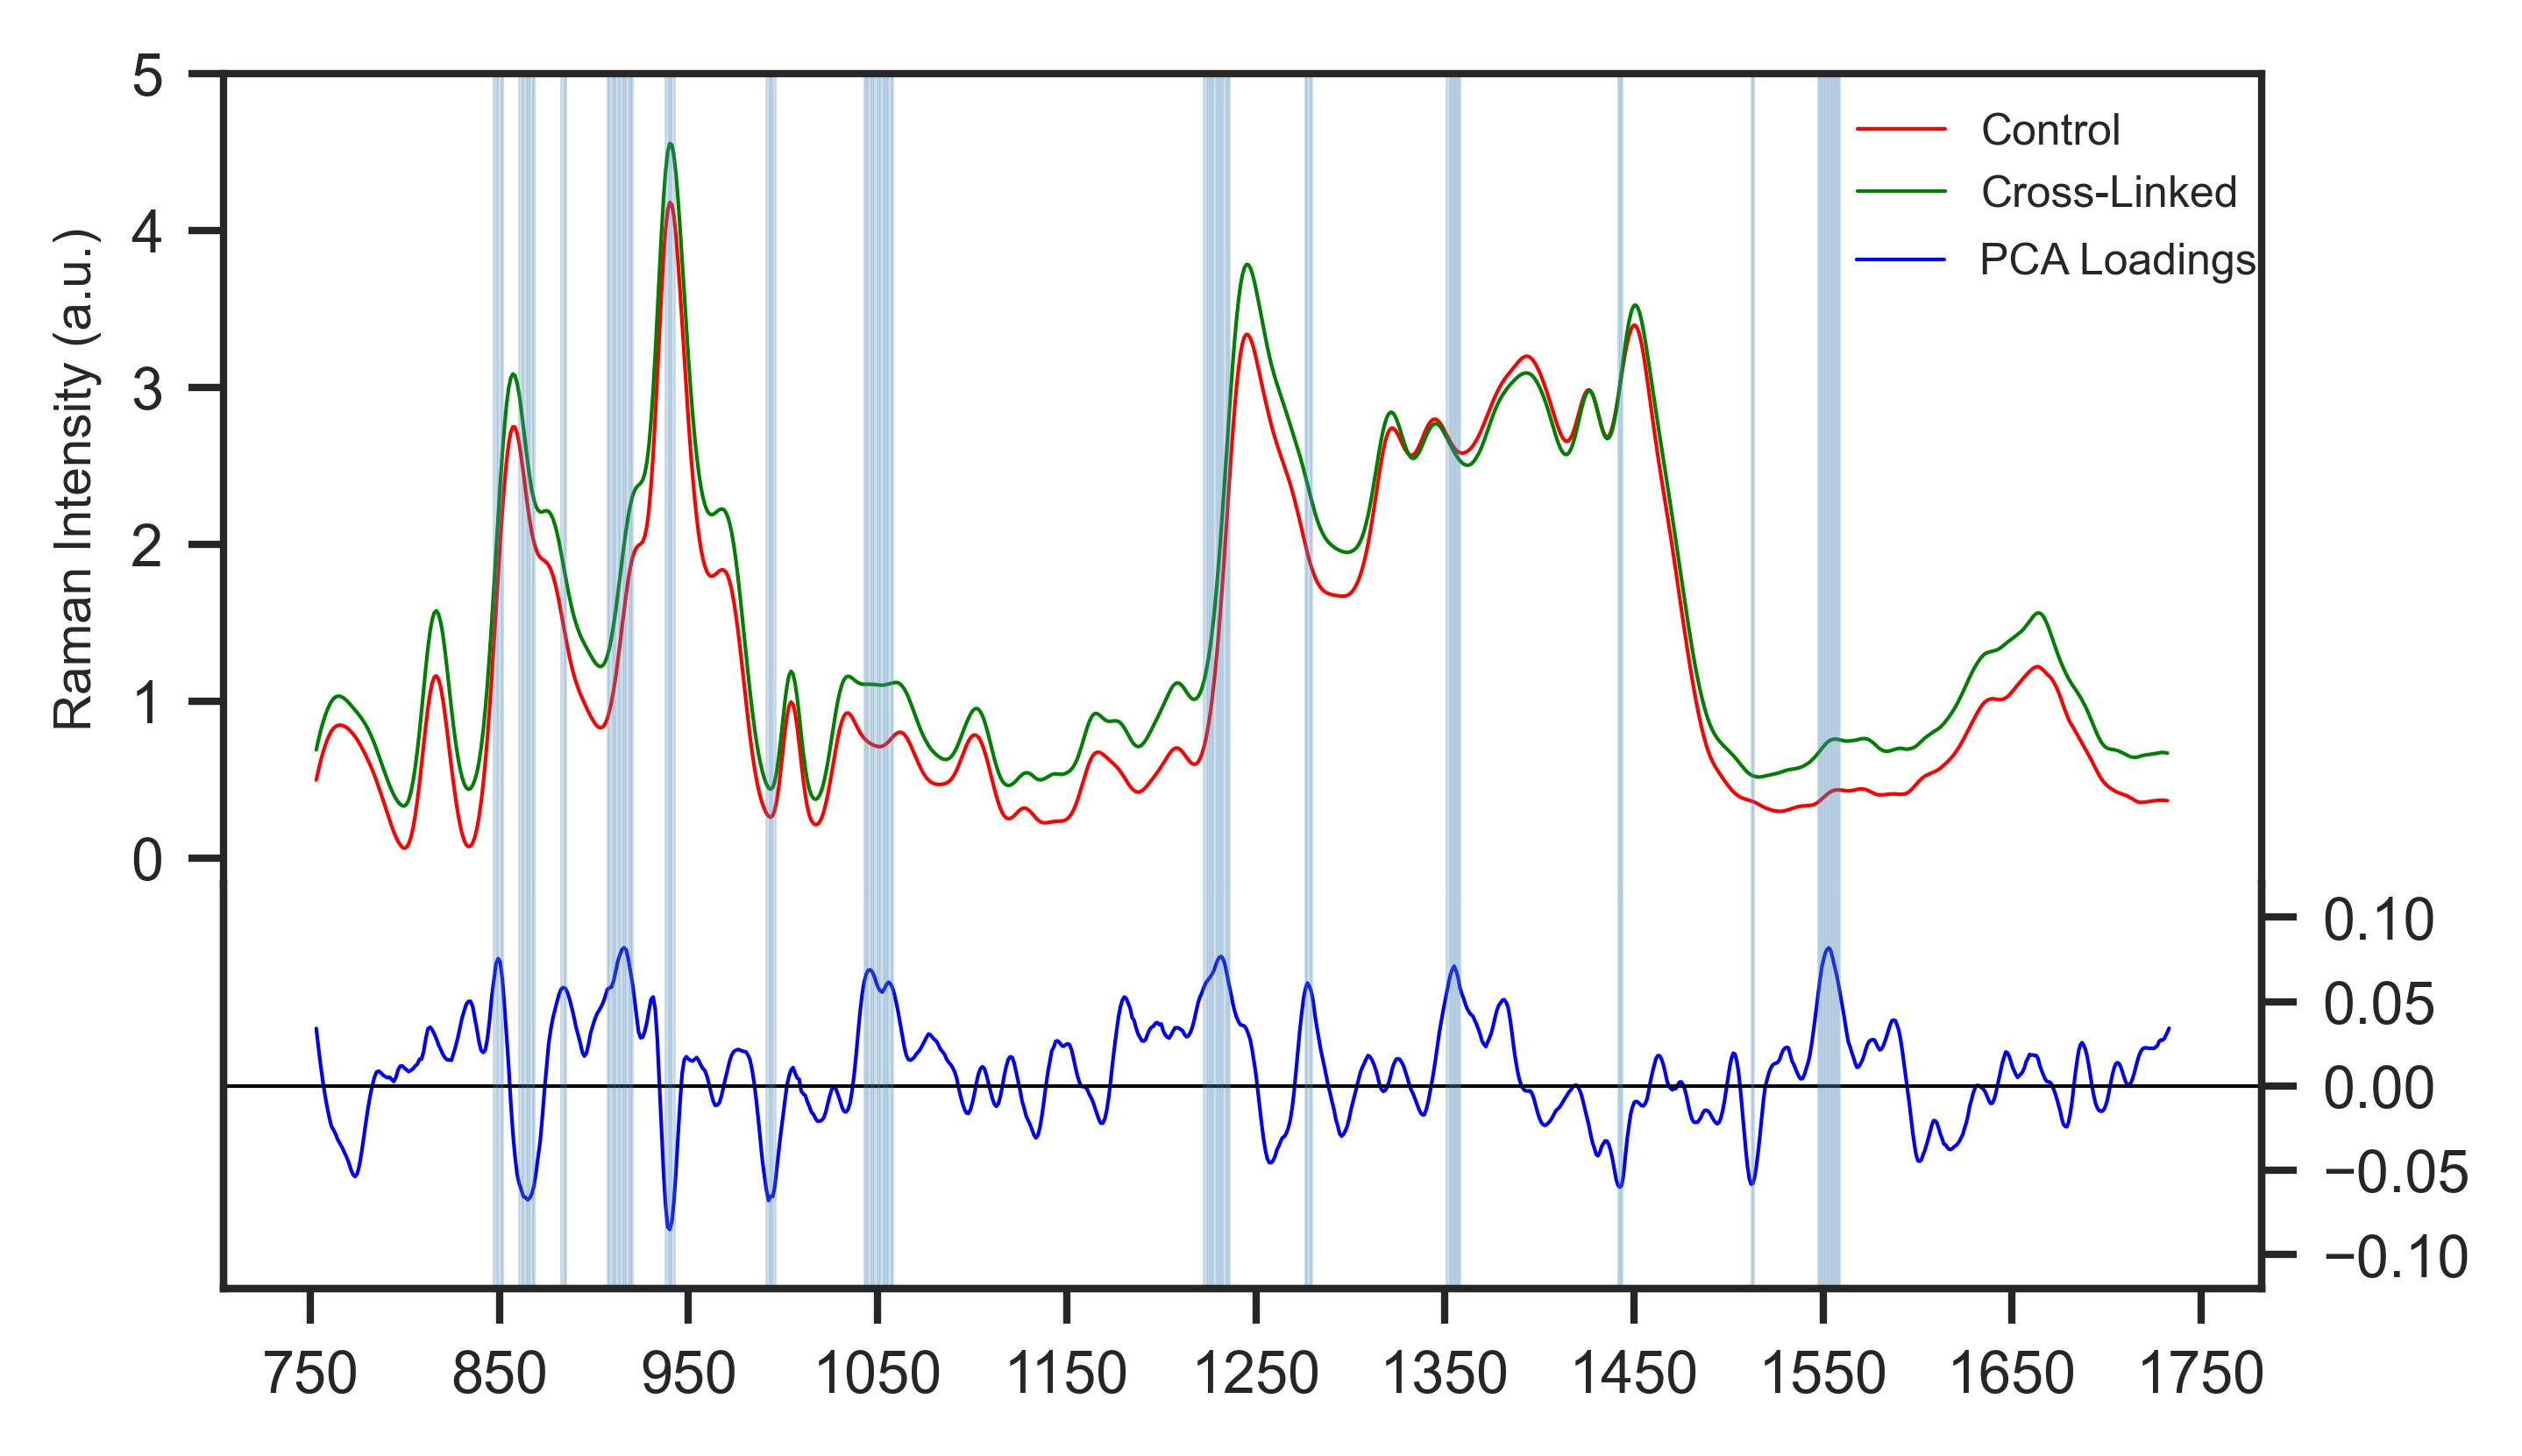

In [27]:

sns.set_theme(style = 'ticks', context = 'paper', font_scale=1.5)
for b in range(4):
    fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(5, 3),
    sharex=True,
    gridspec_kw={"hspace": 0.00, 'height_ratios': [2, 1]},
    dpi = 600
    )

    ax1, ax2= axes
    sns.lineplot(
                x = ctrl_mean.index.astype(float),
                y = ctrl_mean.values, # +b/7,
                #label = trt_mean['trt_time'][b],
                color = 'red',
                lw = .5,
                ax = ax1,
                label = 'Control'
                #f'Mean Spectra: {trt_mean['trt_time'][b]}'
                #hue = 'trt_time'
            #palette=col_map
    )
    sns.lineplot(
                x = trt_mean.columns[3:].astype(float),
                y = trt_mean.iloc[b, 3:]+.2,
                #label = trt_mean['trt_time'][b],
                color = 'green',
                lw = .5,
                ax = ax1,
                label = 'Cross-Linked'
                #f'Mean Spectra: {trt_mean['trt_time'][b]}'
                #hue = 'trt_time'
            #palette=col_map
            )
    ax2_r = ax2.twinx()
    sns.lineplot(
                x = pcc.columns[1:].astype(float),
                y = pcc.iloc[b, 1:], # +b/7,
                #label = pcc['exp'][b],
                color = 'blue',
                lw = .5,
                ax = ax2_r,
                label = 'PCA Loadings'
                #hue = 'trt_time'
            #palette=col_map
            )
    #plt.legend(bbox_to_anchor = (1, 1), frameon = False)
    #plt.xlabel("Raman Shift (cm$^{-1}$)")
    #plt.ylabel("Normalized Intensity (a.u.)")
    #plt.ylim(-.05, .75)
    #plt.xticks(np.arange(750, 1760, 100), fontsize = 6)

    ax2.yaxis.set_visible(False)
    ax2_r. set_ylim(-.12, .12)
    ax2_r.set_ylabel('', fontsize = 6)
    ax2_r.axhline(0, lw = .5, color = 'black')
    ax2_r.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    #ax2.set_xlabel("Raman Shift (cm$^{-1}$)", fontdict = {'size': 7})
    ax2.set_xticks(np.arange(750, 1760, 100))   # just positions
    ax2.tick_params(axis="x", labelsize=8)
    ax1.set_yticks(np.arange(0, 5.2, 1))   # just positions
    ax1.tick_params(axis="y", labelsize=8)
    ax2_r.set_yticks(np.arange(-.1, .11, .05))   # just positions
    ax2_r.tick_params(axis="y", labelsize=8)

    ax1.set_ylabel('Raman Intensity (a.u.)', fontsize = 7)
    #ax1.set_ylim(-.01, .25)
    ax1.spines['bottom'].set_visible(False)

    ax1.legend(frameon = False, fontsize = 6, bbox_to_anchor  =(1.008, 1))
    ax2_r.legend(frameon = False, bbox_to_anchor  =(1.017, 2.68), fontsize = 6) #1.245

#Find loadings with values over 95th percentile as important loadings
    p95 = pcc.iloc[b, 1:].abs().quantile(.90)
    mask = pcc.iloc[b, 1:].abs()>(p95)
    col_idx = mask.to_numpy().nonzero()

    # Optional: get column names and row labels
    cols = pcc.iloc[b, 1:].index[col_idx]

    for p in cols:
        ax1.axvline(x=p, color='steelblue', linestyle='-', linewidth=0.3, alpha = .35)
        ax2_r.axvline(x=p, color='steelblue', linestyle='-', linewidth=0.3, alpha = .35)
    plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\PCASpec+Loadings_Orth_{trt_mean['trt_time'][b]}_shadedlines.tif', dpi = 600, bbox_inches='tight')